In [8]:
import sentence_transformers.SentenceTransformer as st
model = st('./tokenize/allmodels/paraphrase-multilingual-MiniLM-L12-v2')

In [82]:
_str = """In today's digital age, cybersecurity is of paramount importance. As the volume of data exchanged over the internet increases exponentially, the threat landscape becomes more complex and varied. Cyber criminals are continually devising new methods to breach security defenses, making it essential for organizations to stay ahead of potential threats. Implementing robust security protocols, conducting regular vulnerability assessments, and staying informed about the latest cyber threats are crucial steps in safeguarding sensitive information. Additionally, investing in advanced technologies such as artificial intelligence and machine learning can enhance the ability to detect and respond to cyber attacks in real-time. By fostering a culture of security awareness and ensuring that all employees are trained in best practices, organizations can significantly reduce the risk of cyber incidents."""
import nltk
import re
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from concurrent.futures import ThreadPoolExecutor, as_completed
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Load resources once
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")
nltk.download('wordnet')

def clean_text(text):
    text = re.sub(r'<[^>]+>|[^a-z0-9\s]', '', text.lower())
    tokens = re.findall(r'\b\w+\b', text)
    return {lemmatizer.lemmatize(token) for token in tokens if token not in stop_words}
_str = list(clean_text(_str))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
import random
import numpy as np
def squared_distance(input, mean):
    return sum(np.square(input-mean))

def vector_mean(inputs):
    return np.mean(inputs, axis=0)

class KMeans:
    """performs k-means clustering"""
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k), key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        # choose k random points as the initial means
        self.means = random.sample(inputs, self.k)
        assignments = None
        while True:
            # Find new assignments
            new_assignments = map(self.classify, inputs)
            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return
            # Otherwise keep the new assignments,
            assignments = new_assignments
            # And compute new means based on the new assignments
            for i in range(self.k):
            # find all the points assigned to cluster i
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # make sure i_points is not empty so don't divide by 0
                if i_points:
                    self.means[i] = vector_mean(i_points)

In [84]:
inputs_emb = model.encode(_str)

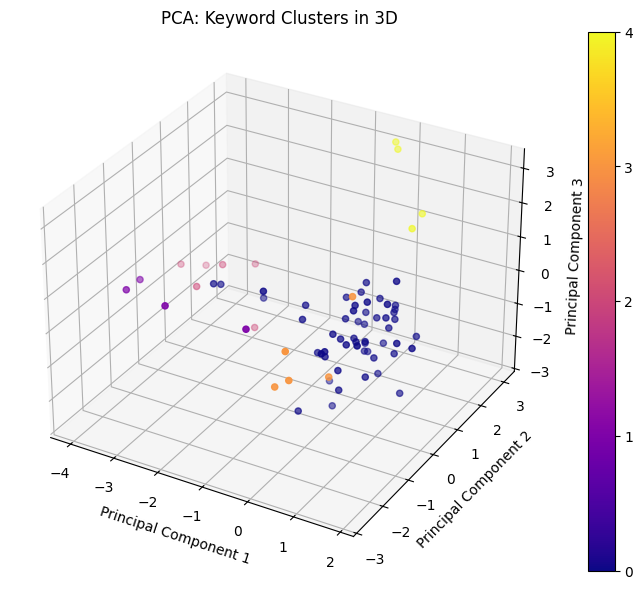

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


keyword_vectors = inputs_emb  


num_clusters =  5 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(keyword_vectors)

pca = PCA(n_components=3)
reduced_vectors_pca = pca.fit_transform(keyword_vectors)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], reduced_vectors_pca[:, 2], 
                     c=clusters, cmap='plasma')

ax.set_title('PCA: Keyword Clusters in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.colorbar(scatter, ax=ax, ticks=range(num_clusters))
plt.show()



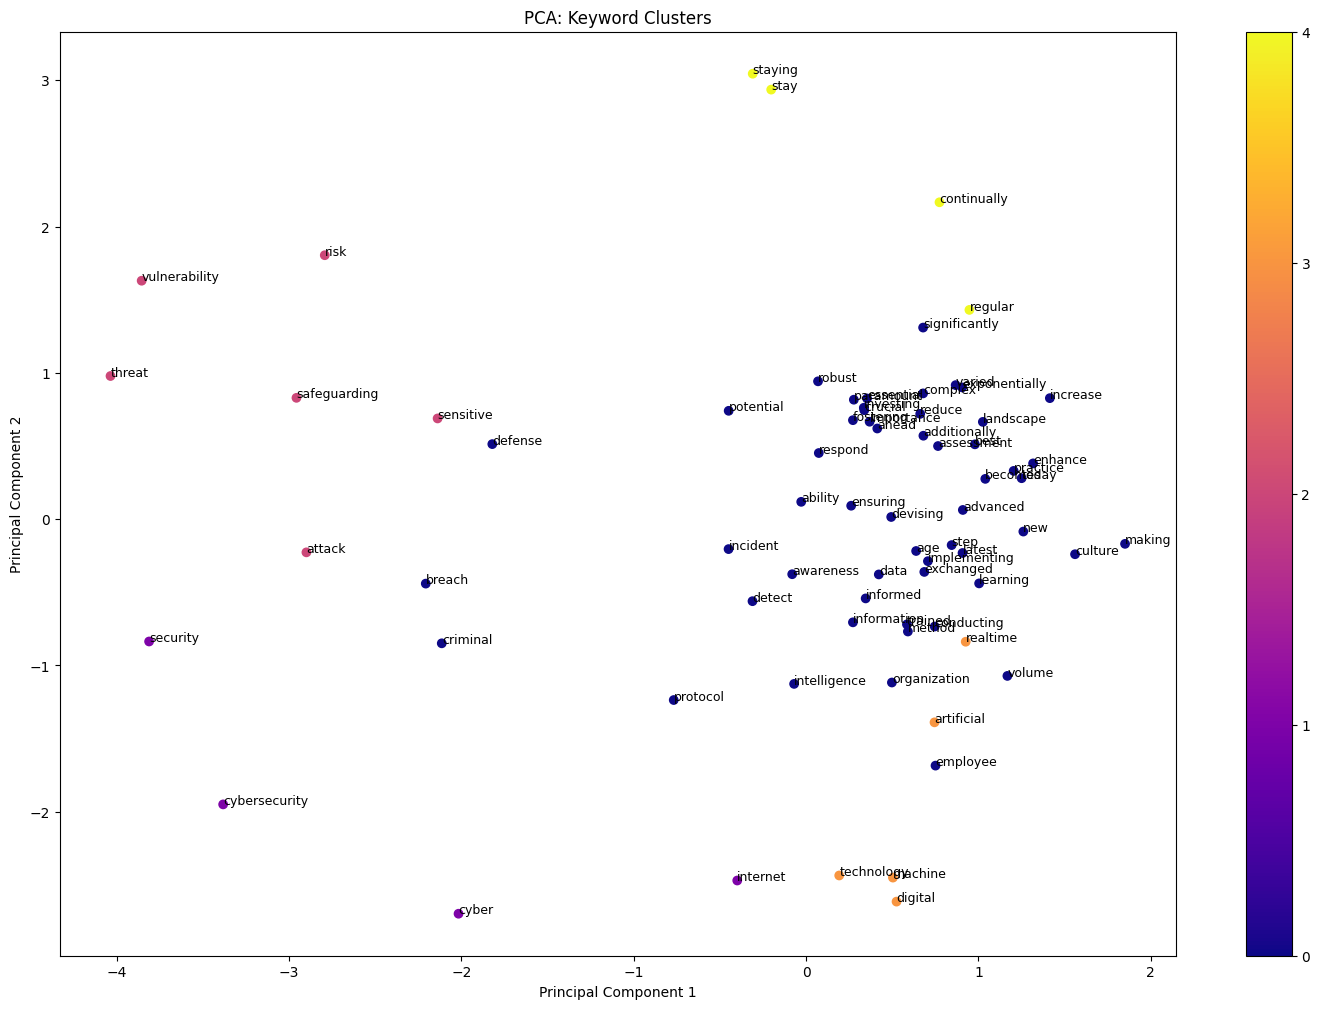

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

keyword_vectors = inputs_emb
keywords = _str  

num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(keyword_vectors)

colormap = 'plasma'  # Options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', etc.

pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(keyword_vectors)

plt.figure(figsize=(18, 12))
scatter_pca = plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], c=clusters, cmap=colormap)

for i, keyword in enumerate(keywords):
    plt.text(reduced_vectors_pca[i, 0], reduced_vectors_pca[i, 1], keyword, fontsize=9)

plt.title('PCA: Keyword Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_pca, ticks=range(num_clusters))
plt.show()


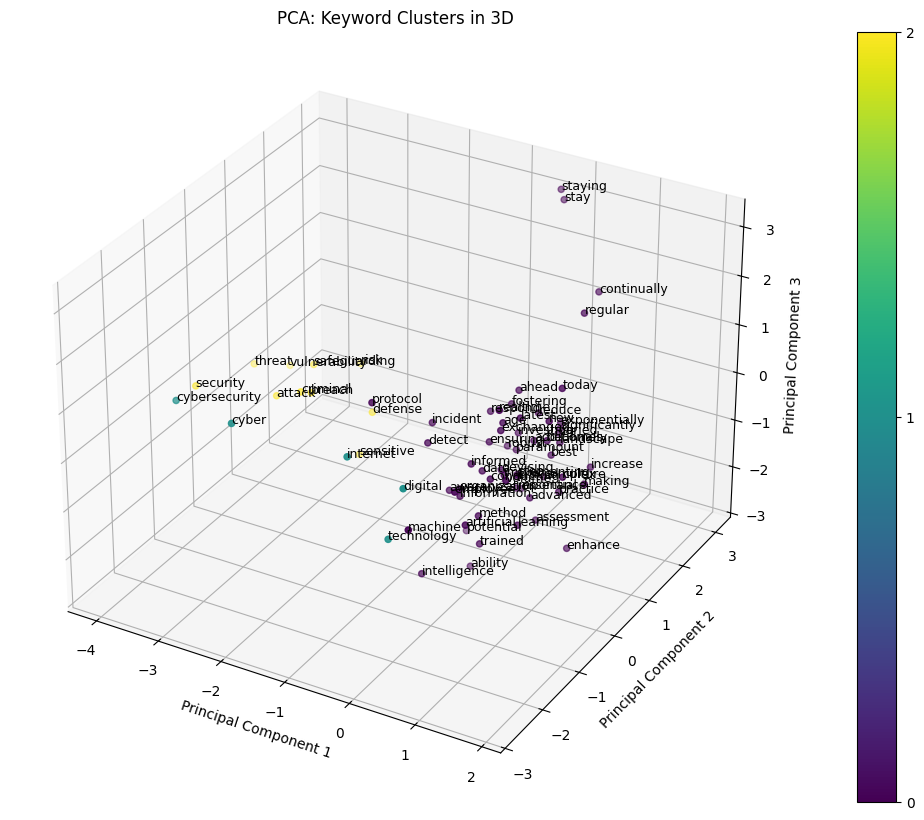

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Define your keyword vectors and corresponding labels
keyword_vectors = inputs_emb  # Example: Replace with your actual keyword vectors
keywords = _str  # Example labels; replace with your actual keywords

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(keyword_vectors)

# Cluster using K-Means
num_clusters = 3  # Choose the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(keyword_vectors)

# Dimensionality reduction using PCA
pca = PCA(n_components=3)
reduced_vectors_pca = pca.fit_transform(keyword_vectors)

# Plotting the clusters in 3D using PCA
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], reduced_vectors_pca[:, 2], 
                     c=clusters, cmap='viridis')

# Add labels to the points
for i, keyword in enumerate(keywords):
    ax.text(reduced_vectors_pca[i, 0], reduced_vectors_pca[i, 1], reduced_vectors_pca[i, 2], 
            keyword, fontsize=9)

ax.set_title('PCA: Keyword Clusters in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.colorbar(scatter, ax=ax, ticks=range(num_clusters))
plt.show()


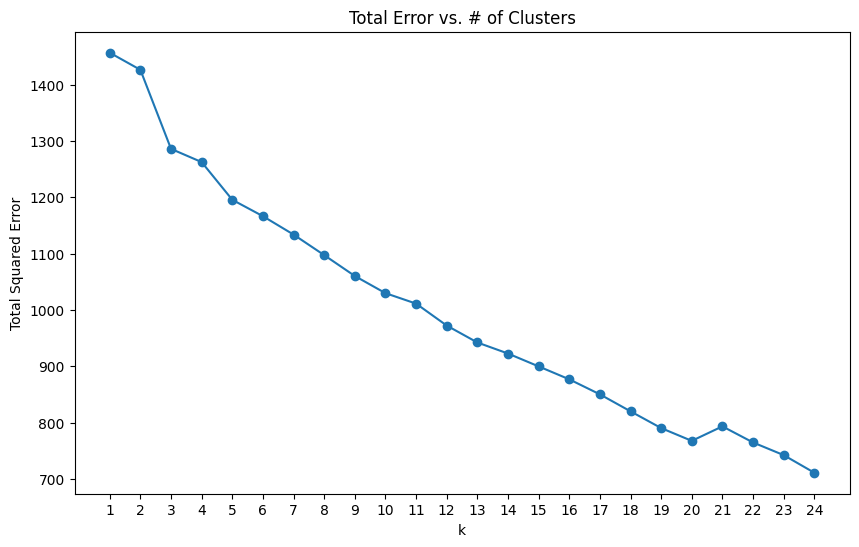

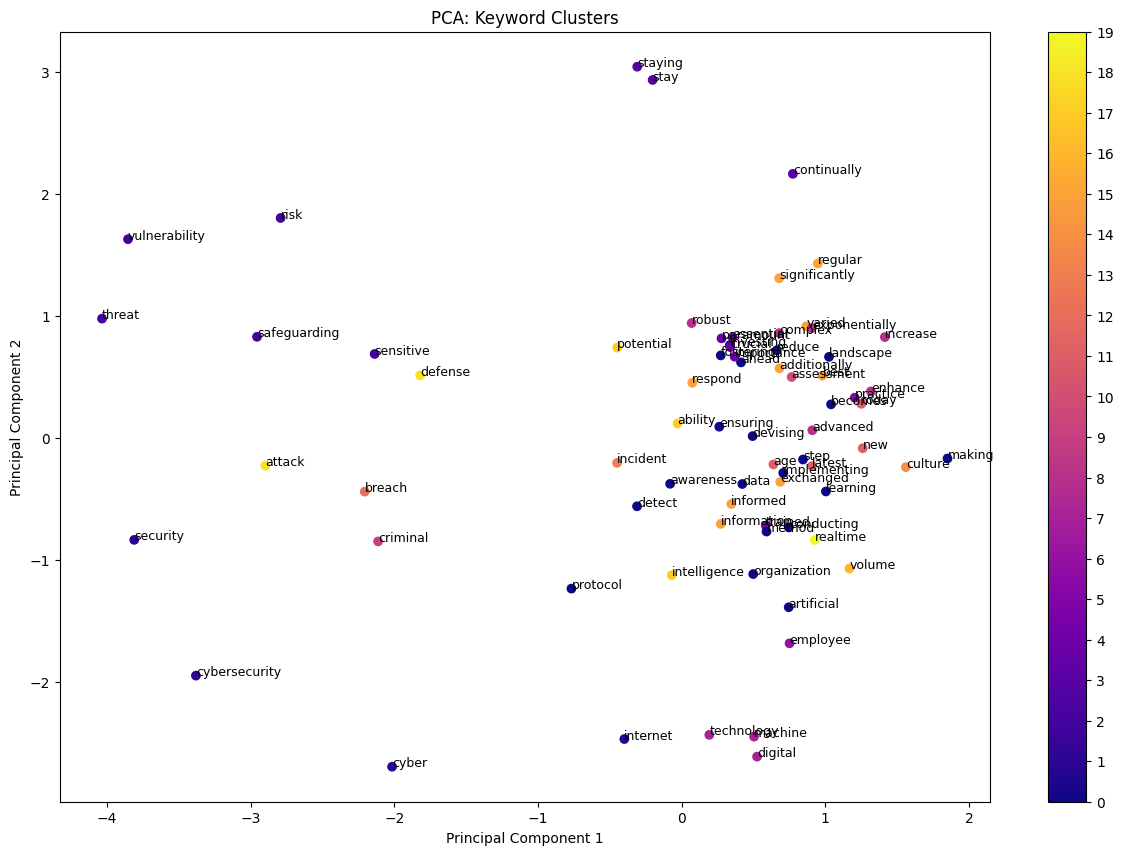

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Define your keyword vectors and corresponding labels
keyword_vectors = inputs_emb  # Example: Replace with your actual keyword vectors
keywords = _str # Example labels; replace with your actual keywords

# Define a function to calculate the squared distance
def squared_distance(a, b):
    return np.sum((a - b) ** 2)

# Define a function to calculate the total squared error from k-means clustering
def squared_clustering_errors(inputs, k):
    """Finds the total squared error from k-means clustering the inputs"""
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(inputs)
    means = kmeans.cluster_centers_
    assignments = kmeans.predict(inputs)
    return sum(squared_distance(input, means[cluster]) for input, cluster in zip(inputs, assignments))

# Define the range of k values to test
ks = range(1, len(keyword_vectors) // 3 + 1)

# Compute the total squared error for each k
errors = [squared_clustering_errors(keyword_vectors, k) for k in ks]

# Plot the errors vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(ks, errors, marker='o')
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Total Squared Error")
plt.title("Total Error vs. # of Clusters")
plt.show()

# Choose an optimal k based on the elbow method
optimal_k = 20#ks[np.argmin(errors)]

# Cluster using K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(keyword_vectors)

# Dimensionality reduction using PCA to 2 components
pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(keyword_vectors)

# Plotting the clusters in 2D using PCA
plt.figure(figsize=(15, 10))

# Choose a different colormap
colormap = 'plasma'  # Options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', etc.

scatter_pca = plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], c=clusters, cmap=colormap)

# Add labels to the points
for i, keyword in enumerate(keywords):
    plt.text(reduced_vectors_pca[i, 0], reduced_vectors_pca[i, 1], keyword, fontsize=9)

plt.title('PCA: Keyword Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_pca, ticks=range(optimal_k))
plt.show()


#IMAGE CLUSTRING

In [91]:
path_to_png_file = r"daylight-environment.jpg" # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(path_to_png_file)

In [93]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel
pixels = [pixel for row in img for pixel in row]
clusterer = KMeans(5)
clusterer.fit(pixels) 

KMeans(n_clusters=5)

In [98]:
pix_cluster = clusterer.predict(pixels)

In [99]:
import numpy as np
new_img = np.array([clusterer.cluster_centers_[0],clusterer.cluster_centers_[1],
                    clusterer.cluster_centers_[2],
                    clusterer.cluster_centers_[3],
                    clusterer.cluster_centers_[4]])[pix_cluster]

new_img = new_img.reshape((img.shape[0],img.shape[1],3))
new_img = new_img.astype(np.uint8)

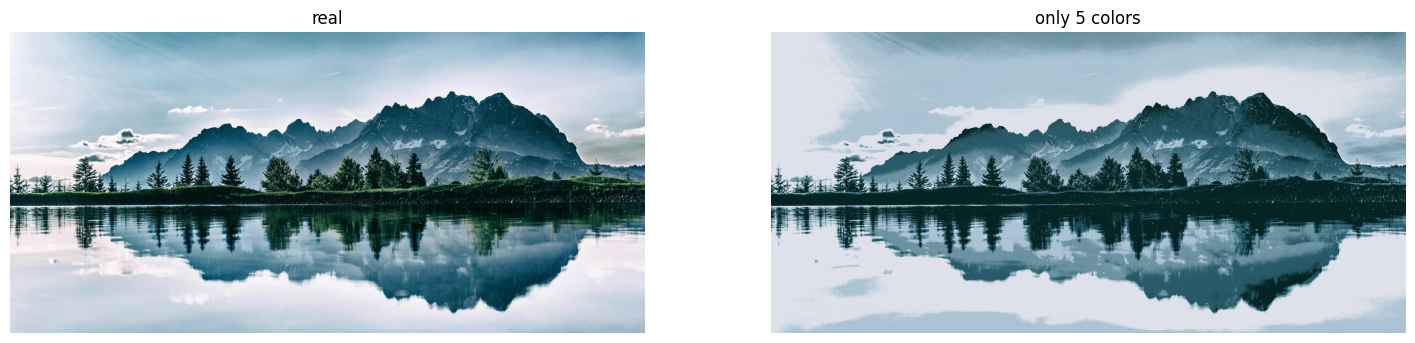

In [100]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # Adjust figsize as needed

# Display images
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('real')

axes[1].imshow(new_img)
axes[1].axis('off')
axes[1].set_title('only 5 colors')

plt.show()


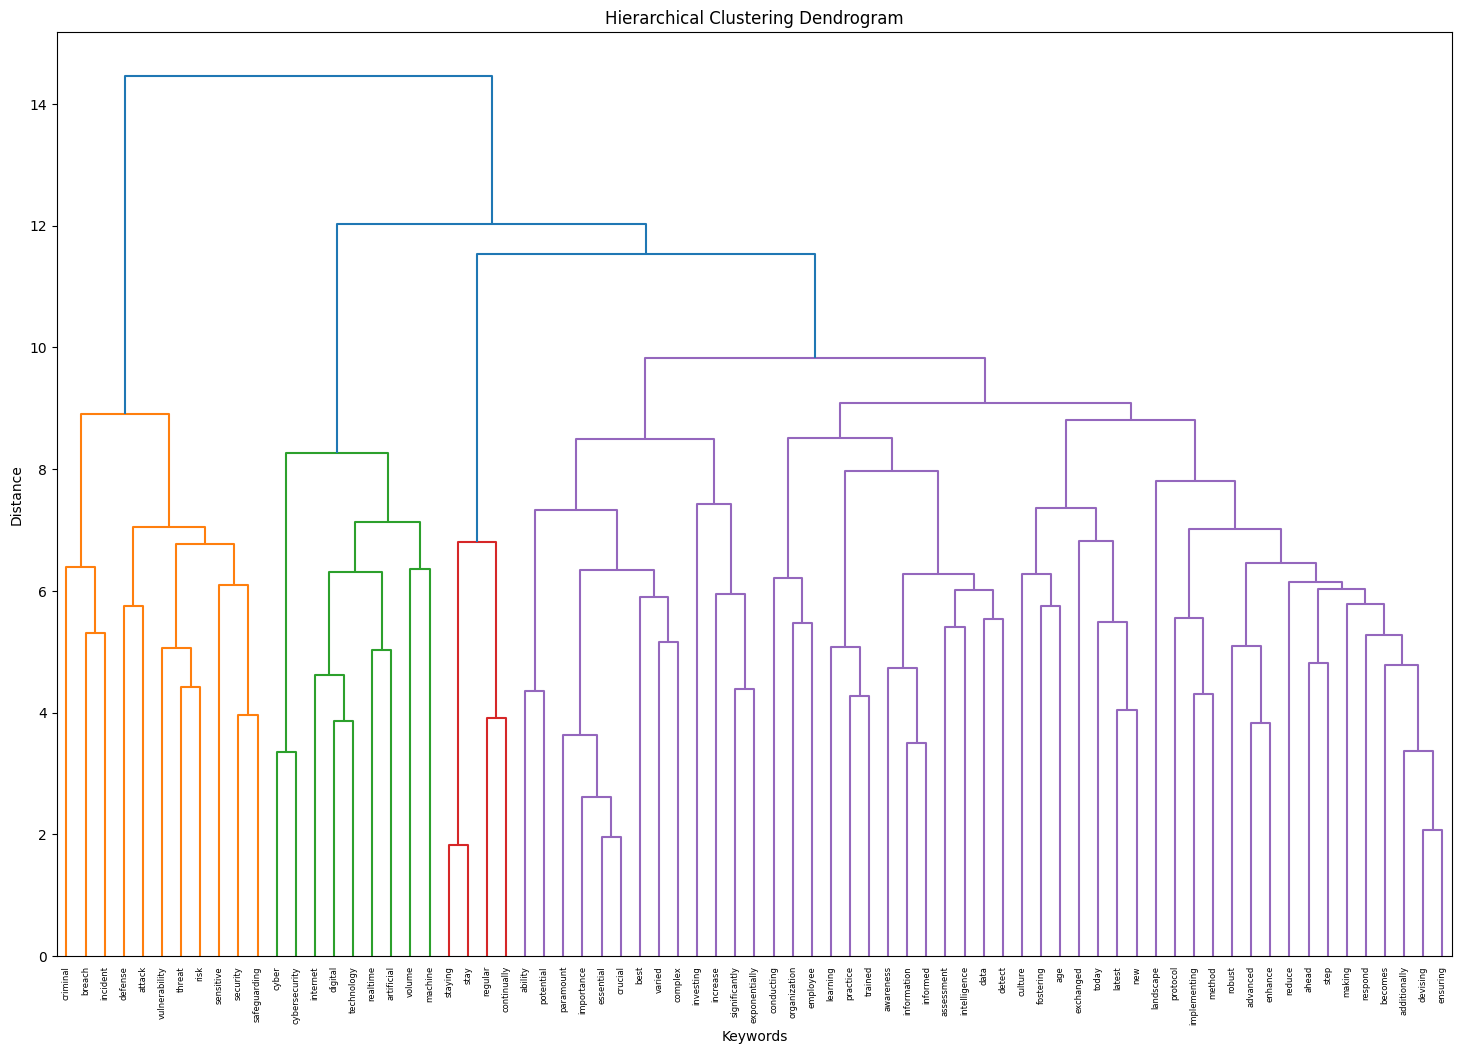

Cluster assignments: [14 73 40 25 61 53 47  6 31 38 16  8 57 11  4 27 34 56 32 19 37 72  7 28
 39  9 68 66 49 36 41 64 23 51 10 21 54 48 24  1 43 33 12 58 63 52 44 45
 42 67 62 46 26 17 69 60 55 13 15 70  5 71 65 50 18 59 20 35  2  3 22 30
 29]


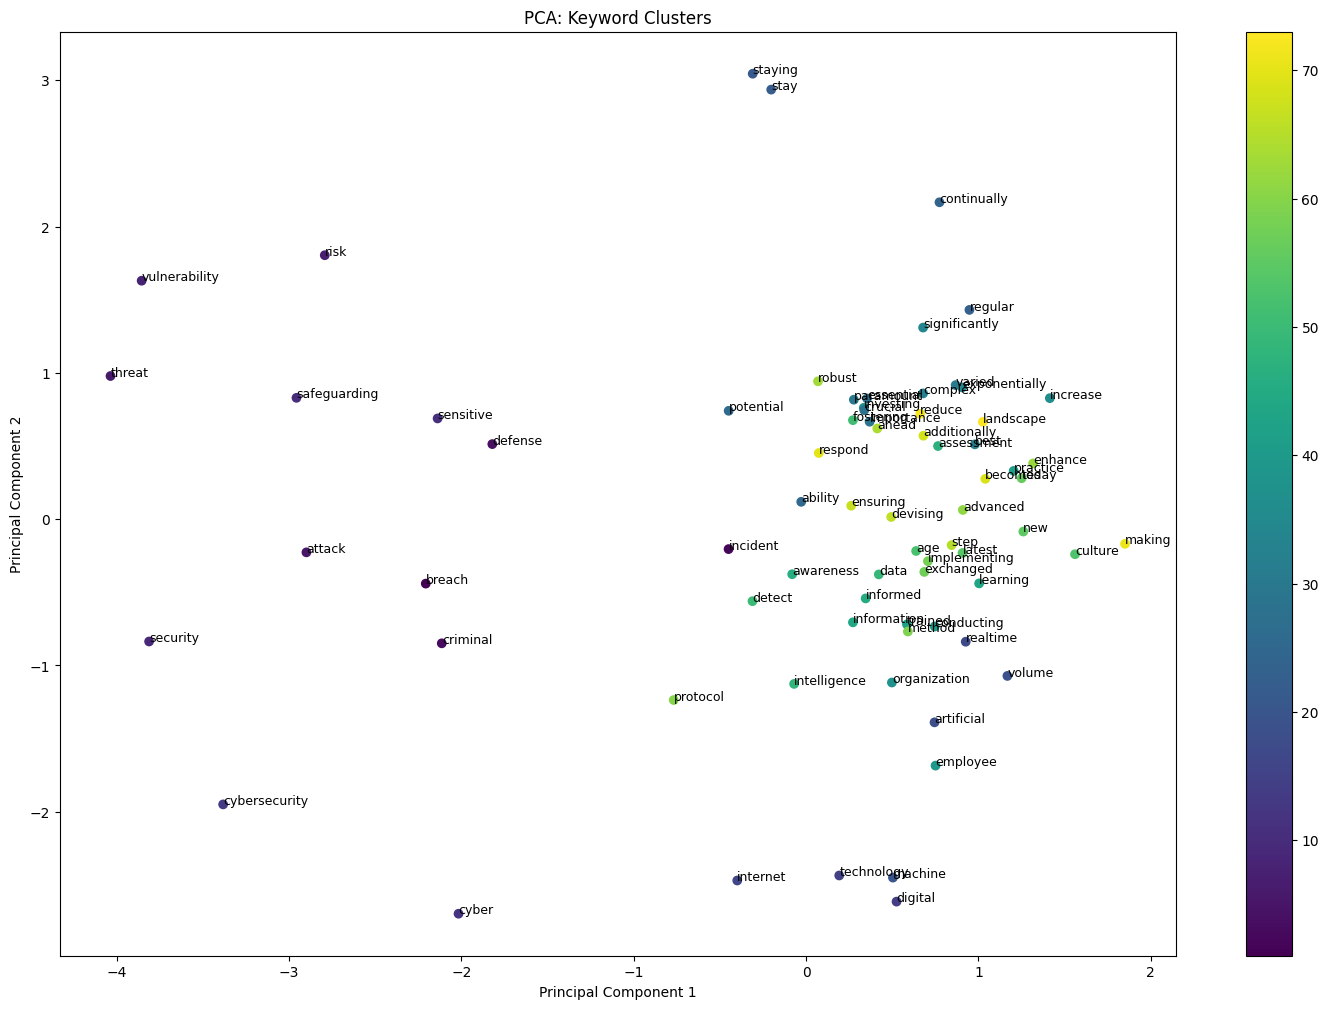

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Generate some sample data for demonstration
# Example: Replace this with your actual keyword vectors
np.random.seed(42)
data = inputs_emb  # 10 samples with 100 features each

# Perform hierarchical clustering
# Method options: 'single', 'complete', 'average', 'ward', etc.
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(18,12 ))
dendrogram(Z, labels=_str)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Keywords')
plt.ylabel('Distance')
plt.show()

# Extract clusters
# The `t` parameter can be adjusted based on the dendrogram to choose the number of clusters
max_distance = 1.5  # Adjust this value based on your dendrogram
clusters = fcluster(Z, max_distance, criterion='distance')

# Print the clusters
print(f"Cluster assignments: {clusters}")

# Visualize the clusters in 2D using PCA for reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.figure(figsize=(18, 12))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
for i, keyword in enumerate(_str):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], keyword, fontsize=9)
plt.title('PCA: Keyword Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
